In [1]:
#classification algorithm(discrete values)
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#to load the file
df=pd.read_csv("kaggle_diabetes.csv")

In [3]:
#show first 5 records
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [6]:
#to check the null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

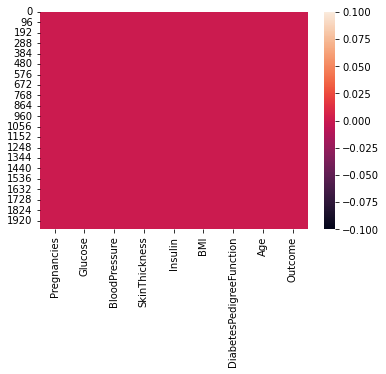

In [7]:
#to visualise the null values,use inbuilt function heatmap
sb.heatmap(df.isnull())
plt.show()

In [8]:
#cross check
#to check data types
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [9]:
#to check duplicates values
df.duplicated().sum()

1256

In [10]:
#to check how many rows and columns
df.shape

(2000, 9)

0    1316
1     684
Name: Outcome, dtype: int64


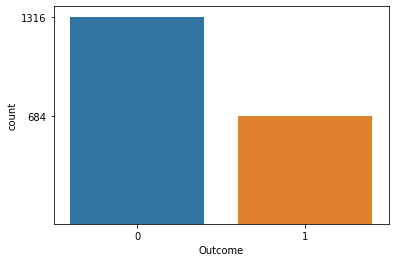

In [11]:
#check balance or unbalance 
#here target:Outcome
#check categorical data use countplot
sb.countplot(data=df,x='Outcome')
f=df['Outcome'].value_counts()
print(f)
plt.yticks(f)
plt.show()

In [12]:
#here dataset is balanced

In [13]:
#to select input and output
x=df.drop("Outcome",axis=1)  #to select i/p
y=df['Outcome']  #to select o/p

In [14]:
#call train_test_split
from sklearn.model_selection import train_test_split

In [15]:
#train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [16]:
x_train.shape

(1400, 8)

In [17]:
x_test.shape

(600, 8)

In [18]:
y_train.shape

(1400,)

In [19]:
y_test.shape

(600,)

In [20]:
#apply scaling on x_train and x_test (only input)
from sklearn.preprocessing import StandardScaler
#create the object of St standardScaler class
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [21]:
#create user defined function
def create_model(model):
    model.fit(x_train,y_train)  #train the model with 70% data
    y_pred=model.predict(x_test)  #train the model with 30% data
    #generate report
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    return model

In [22]:
from sklearn.metrics import classification_report,confusion_matrix

# LogisticRegression

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
#create the object of LogisticRegression class
lr=LogisticRegression()

In [25]:
#call function
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       404
           1       0.71      0.61      0.66       196

    accuracy                           0.79       600
   macro avg       0.77      0.75      0.75       600
weighted avg       0.79      0.79      0.79       600

[[355  49]
 [ 76 120]]


In [26]:
#here recall is =0.61 (61%)

# DecisionTreeClassifier

In [27]:
#DecisionTreeClassifier with GINI INDEX 

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
#create the object of DecisionTreeClassifier class
dt=DecisionTreeClassifier()

In [30]:
#call function
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       404
           1       0.88      0.94      0.91       196

    accuracy                           0.94       600
   macro avg       0.93      0.94      0.93       600
weighted avg       0.94      0.94      0.94       600

[[379  25]
 [ 11 185]]


In [31]:
#here recall is =0.94 (94%)

# purning techniques

In [32]:
#Pruning Technique : max_depth  : the value of max_depth cannot more than
#8  (means <=8) 
#create object of DecisionTreeClassifier class with gini index and 
#use parameter max_depth (to remove overfitting)

In [33]:
"""for i in range(1,9):   #start=1 stop=9-1=8 step=1
    dt=DecisionTreeClassifier(random_state=1,max_depth=i)
    print("max_depth:",i)
    dt=create_model(dt)"""

'for i in range(1,9):   #start=1 stop=9-1=8 step=1\n    dt=DecisionTreeClassifier(random_state=1,max_depth=i)\n    print("max_depth:",i)\n    dt=create_model(dt)'

In [34]:
dt=DecisionTreeClassifier(random_state=1,max_depth=5)
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.89      0.81      0.85       404
           1       0.67      0.79      0.73       196

    accuracy                           0.81       600
   macro avg       0.78      0.80      0.79       600
weighted avg       0.82      0.81      0.81       600

[[329  75]
 [ 41 155]]


In [35]:
#here recall value is 0.79(79%) 

# 2nd purning technique

In [36]:
#2nd pruning technique:min_samples_leaf=it is used to reduce overfitting
#create obj of DecisionTreeClassifier class 
#45-100

In [37]:
"""for i in range(45,101):   #start=45 stop=101-1=100 step=1
    dt=DecisionTreeClassifier(random_state=1,min_samples_leaf=i)
    print("min_samples_leaf:",i)
    dt=create_model(dt)"""

'for i in range(45,101):   #start=45 stop=101-1=100 step=1\n    dt=DecisionTreeClassifier(random_state=1,min_samples_leaf=i)\n    print("min_samples_leaf:",i)\n    dt=create_model(dt)'

In [38]:
dt=DecisionTreeClassifier(random_state=1,min_samples_leaf=45)
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       404
           1       0.66      0.69      0.68       196

    accuracy                           0.79       600
   macro avg       0.76      0.76      0.76       600
weighted avg       0.79      0.79      0.79       600

[[335  69]
 [ 60 136]]


In [39]:
#here recall is 0.69(69%)

# DecisionTreeClassifier(Entropy)

In [40]:
#from sklearn.tree import DecisionTreeClassifier

In [41]:
dt=DecisionTreeClassifier(random_state=1,criterion="entropy")

In [42]:
#call function
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       404
           1       0.87      0.96      0.91       196

    accuracy                           0.94       600
   macro avg       0.92      0.94      0.93       600
weighted avg       0.94      0.94      0.94       600

[[376  28]
 [  8 188]]


In [43]:
#recall 0.96(96%)

# purning technique

In [44]:
#Pruning Technique : max_depth  : the value of max_depth cannot more than
#8  (means <=8) 
#create object of DecisionTreeClassifier class with gini index and 
#use parameter max_depth (to remove overfitting)

In [45]:
"""for i in range(1,9):   #start=1 stop=9-1=8 step=1
    dt=DecisionTreeClassifier(random_state=1,max_depth=i,criterion="entropy")
    print("max_depth:",i)
    dt=create_model(dt)"""

'for i in range(1,9):   #start=1 stop=9-1=8 step=1\n    dt=DecisionTreeClassifier(random_state=1,max_depth=i,criterion="entropy")\n    print("max_depth:",i)\n    dt=create_model(dt)'

In [46]:
dt=DecisionTreeClassifier(random_state=1,max_depth=8,criterion="entropy")
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.92      0.80      0.86       404
           1       0.68      0.86      0.76       196

    accuracy                           0.82       600
   macro avg       0.80      0.83      0.81       600
weighted avg       0.84      0.82      0.83       600

[[324  80]
 [ 27 169]]


In [47]:
#here recall 0.86(86%) 

# 2nd purning technique

In [48]:
#2nd pruning technique:min_samples_leaf=it is used to reduce overfitting
#create obj of DecisionTreeClassifier class 
#45-100

In [49]:
"""for i in range(45,101):   #start=45 stop=101-1=100 step=1
    dt=DecisionTreeClassifier(random_state=1,min_samples_leaf=i,criterion="entropy")
    print("min_samples_leaf:",i)
    dt=create_model(dt)"""

'for i in range(45,101):   #start=45 stop=101-1=100 step=1\n    dt=DecisionTreeClassifier(random_state=1,min_samples_leaf=i,criterion="entropy")\n    print("min_samples_leaf:",i)\n    dt=create_model(dt)'

In [50]:
dt=DecisionTreeClassifier(random_state=1,min_samples_leaf=74,criterion="entropy")
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.87      0.80      0.83       404
           1       0.64      0.74      0.69       196

    accuracy                           0.78       600
   macro avg       0.75      0.77      0.76       600
weighted avg       0.79      0.78      0.78       600

[[322  82]
 [ 50 146]]


In [51]:
#here recall is 0.74(74%)

# RandomForestClassifier

In [52]:
#Apply Random Forest Tree :It is Bootstraping Ensembling Technique
#It is work with Bagging classifier Bootstraping Ensembling Technique
#In RandomForestTree:Train the dataset on multiple DecisionTree Algo.
#sklearn-package
#Ensemble -outer class
#RandomForestClassifier class -inner calss
#fit()
#predict()
#ensemble means to train given dataset on multiple algo.

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
#create the object of RandomForestClassifier class
"""for i in range(10,101):    #start=10 stop=101-1=100 step=1 bydefault=10
    rfc=RandomForestClassifier(n_estimators=i,random_state=1)
    print("No. of decision tree:",i)
    rfc=create_model(rfc)"""

'for i in range(10,101):    #start=10 stop=101-1=100 step=1 bydefault=10\n    rfc=RandomForestClassifier(n_estimators=i,random_state=1)\n    print("No. of decision tree:",i)\n    rfc=create_model(rfc)'

In [55]:
rfc=RandomForestClassifier(n_estimators=11,random_state=1)
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       404
           1       0.92      0.99      0.95       196

    accuracy                           0.97       600
   macro avg       0.95      0.97      0.96       600
weighted avg       0.97      0.97      0.97       600

[[386  18]
 [  2 194]]


In [56]:
#here recall 0.99%(99%)

# purning technique(gini index)

In [57]:
#Pruning Technique : max_depth  : the value of max_depth cannot more than
#8  (means <=8) 
#create object of DecisionTreeClassifier class with gini index and 
#use parameter max_depth (to remove overfitting)

In [58]:
"""for i in range(1,9):   #start=1 stop=9-1=8 step=1
    rfc1=RandomForestClassifier(n_estimators=11,random_state=1,max_depth=i)
    print("max_depth:",i)
    rfc1=create_model(dt)"""

'for i in range(1,9):   #start=1 stop=9-1=8 step=1\n    rfc1=RandomForestClassifier(n_estimators=11,random_state=1,max_depth=i)\n    print("max_depth:",i)\n    rfc1=create_model(dt)'

In [59]:
rfc1=RandomForestClassifier(n_estimators=11,random_state=1,max_depth=1)
rfc1=create_model(dt)

              precision    recall  f1-score   support

           0       0.87      0.80      0.83       404
           1       0.64      0.74      0.69       196

    accuracy                           0.78       600
   macro avg       0.75      0.77      0.76       600
weighted avg       0.79      0.78      0.78       600

[[322  82]
 [ 50 146]]


In [60]:
#here recall 0.74(74%)

# 2nd purning technique

In [61]:
#2nd pruning technique:min_samples_leaf=it is used to reduce overfitting
#create obj of DecisionTreeClassifier class 
#45-100

In [62]:
"""for i in range(45,101):   #start=45 stop=101-1=100 step=1
    rfc1=RandomForestClassifier(n_estimators=11,random_state=1,min_samples_leaf=i)
    print("min_samples_leaf:",i)
    rfc1=create_model(rfc1)"""

'for i in range(45,101):   #start=45 stop=101-1=100 step=1\n    rfc1=RandomForestClassifier(n_estimators=11,random_state=1,min_samples_leaf=i)\n    print("min_samples_leaf:",i)\n    rfc1=create_model(rfc1)'

In [63]:
rfc1=RandomForestClassifier(n_estimators=11,random_state=1,min_samples_leaf=59)
rfc1=create_model(rfc1)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       404
           1       0.67      0.68      0.68       196

    accuracy                           0.79       600
   macro avg       0.76      0.76      0.76       600
weighted avg       0.79      0.79      0.79       600

[[339  65]
 [ 63 133]]


In [64]:
#here 0.68(68%)

# Boosting Technique

In [65]:
#Apply Ensembling Technique Boosting
#1.first apply ADA Boost: call inbuilt class AdaBoostClassifier
#sklearn-package
#ensemble -outer class
#AdaBoostClassifier-inner class

1.Ada Boosting technique

In [66]:
from sklearn.ensemble import AdaBoostClassifier

In [67]:
"""for i in range(1,14):  #start=1 stop=14-1=13 step=1
    #create the object of AdaBoostClassifier class
    abc=AdaBoostClassifier(n_estimators=i,random_state=1)
    print('no. of estimators:',i)
    #call function
    abc=create_model(abc)"""

"for i in range(1,14):  #start=1 stop=14-1=13 step=1\n    #create the object of AdaBoostClassifier class\n    abc=AdaBoostClassifier(n_estimators=i,random_state=1)\n    print('no. of estimators:',i)\n    #call function\n    abc=create_model(abc)"

In [68]:
abc=AdaBoostClassifier(n_estimators=1,random_state=1)
#call function
abc=create_model(abc)

              precision    recall  f1-score   support

           0       0.83      0.75      0.79       404
           1       0.58      0.68      0.62       196

    accuracy                           0.73       600
   macro avg       0.70      0.72      0.71       600
weighted avg       0.75      0.73      0.74       600

[[305  99]
 [ 62 134]]


In [69]:
#here recall is 0.68(68%)

2. GRADIENT BOOSTING

In [70]:
#2. Gradient Boosting(GB) : - 
#Its basically focus on short comings error  means fully grown tree 
#error means residual =actual output-predicted output

#2. gradient Boost technuique : second tech. of Boosting Ensembling 
#technique 
# GB  : - its create a fully grown tree.this algorithm is focus on 
#short comings 
#short comings means error

In [71]:
#call inbuilt class for gradient boosting:GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [72]:
"""for i in range(10,101):  #start=10 stop=101-1=100 step=1
    #create the object of GradientBoostingClassifier class
    gbc=GradientBoostingClassifier(n_estimators=i,random_state=1)
    print('no. of estimators:',i)
    #call function
    gbc=create_model(gbc)"""

"for i in range(10,101):  #start=10 stop=101-1=100 step=1\n    #create the object of GradientBoostingClassifier class\n    gbc=GradientBoostingClassifier(n_estimators=i,random_state=1)\n    print('no. of estimators:',i)\n    #call function\n    gbc=create_model(gbc)"

In [73]:
gbc=GradientBoostingClassifier(n_estimators=96,random_state=1)
gbc=create_model(gbc)

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       404
           1       0.83      0.85      0.84       196

    accuracy                           0.89       600
   macro avg       0.88      0.88      0.88       600
weighted avg       0.89      0.89      0.89       600

[[369  35]
 [ 30 166]]


In [74]:
#here recall is 0.85(85%)

3.EXTREME GRADIENT BOOSTING (XGB)

In [75]:
#3. Extreame Gradient Boosting  : 3rd technique of Boosting 
#This is better version of gradient boosting . . short form XGB 
#why call better version of Gradient Boosting : -
#1. XG Bossting use : - Multithreading technique
#2. It takes less memory space and faster 
#3. It is very useful to handle huge amt of data .Its deal large amount of data
#4. Its handle outlier because have inbuilt capability
#5. Its handle null values 
#6. Its handle automatic overfitting situation .

In [76]:
#Call inbuilt class:XGBClassifier
#inbuilt package xgboost
#first time install xgboost on system
#!pip install xgboost

In [77]:
from xgboost import XGBClassifier

In [78]:
"""for i in range(10,101):  #start=10 step=101-1=100 step=1
    #create the objrct of GradientBoostingClassifier class
    xgc=XGBClassifier(n_estimators=i,reg_alpha=1,random_state=1)
    #reg_alpha=1 means yes
    print('no. of estimators:',i)
    #call function
    xgc=create_model(xgc)"""

"for i in range(10,101):  #start=10 step=101-1=100 step=1\n    #create the objrct of GradientBoostingClassifier class\n    xgc=XGBClassifier(n_estimators=i,reg_alpha=1,random_state=1)\n    #reg_alpha=1 means yes\n    print('no. of estimators:',i)\n    #call function\n    xgc=create_model(xgc)"

In [79]:
xgc=XGBClassifier(n_estimators=54,reg_alpha=1,random_state=1)
xgc=create_model(xgc)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       404
           1       0.92      0.95      0.94       196

    accuracy                           0.96       600
   macro avg       0.95      0.96      0.95       600
weighted avg       0.96      0.96      0.96       600

[[388  16]
 [  9 187]]


In [80]:
#here recall is 0.95(95%)

# Support Vector Machine

1.linear kernal function of SVM 

In [81]:
#give data in support vector machine
#1.linear kernal function of SVM:
#means suppose data are linear separatable with the help of straight line
#call inbuilt class for linear SVM:LinearSVC
#SVC means support vector classifier
#sklearn=package
#svm-outer class
#LinearSVC -inner class
#fit()
#predict()
from sklearn.svm import LinearSVC

In [82]:
#create the object of LinearSVC class
svc=LinearSVC(random_state=1)#no add any error means suppose no outlier in our 
#dataset means it is hard margin

In [83]:
#call function
svc=create_model(svc)

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       404
           1       0.70      0.60      0.65       196

    accuracy                           0.79       600
   macro avg       0.76      0.74      0.75       600
weighted avg       0.78      0.79      0.78       600

[[355  49]
 [ 79 117]]


In [84]:
#here recall is 0.60(60%)

2.polynomial

In [85]:
#call inbuilt class SVC
from sklearn.svm import SVC

In [86]:
#CREATE OBJ of SVC class(use polynomial)
poly_svc=SVC(random_state=1,kernel='poly')

In [87]:
#call function
poly_svc=create_model(poly_svc)

              precision    recall  f1-score   support

           0       0.81      0.95      0.87       404
           1       0.83      0.54      0.65       196

    accuracy                           0.81       600
   macro avg       0.82      0.74      0.76       600
weighted avg       0.82      0.81      0.80       600

[[383  21]
 [ 91 105]]


In [88]:
#here recall is 0.54%(54%)

3.radial

In [89]:
#CREATE OBJ of SVC class(use radial) :value of kernal =rbf
#rbf=radial basic function
r_svc=SVC(random_state=1,kernel='rbf')

In [90]:
#call function
r_svc=create_model(r_svc)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       404
           1       0.77      0.71      0.74       196

    accuracy                           0.83       600
   macro avg       0.82      0.80      0.81       600
weighted avg       0.83      0.83      0.83       600

[[362  42]
 [ 57 139]]


In [91]:
#here recall is 0.71%(71%)

# KNN Algorithm

In [92]:
#Apply KNN Algorithm: inbuilt class KNeighboursClassifier which definer in outer class nrighbours and 
#outer class define in package sklearn
from sklearn.neighbors import KNeighborsClassifier
#create the objecrt of KNeighboursClassifier class and passing some parameters
knc=KNeighborsClassifier(n_neighbors=3,metric="minkowski",p=2)
#p=2 means Euclidean distance method

In [93]:
#call function
knc=create_model(knc)
#recall 0.78(78%)

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       404
           1       0.73      0.78      0.75       196

    accuracy                           0.83       600
   macro avg       0.81      0.82      0.81       600
weighted avg       0.84      0.83      0.83       600

[[347  57]
 [ 43 153]]


In [94]:
#here recall is 0.78(78%)

# Naive Bayes Theorem

In [95]:
#Apply Naive Bayes Theorem
from sklearn.naive_bayes import GaussianNB
#inbuilt class GaussianNB

In [96]:
#creater ther object of GaussianNB class
gnb=GaussianNB()

In [97]:
#call function
gnb=create_model(gnb)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       404
           1       0.65      0.65      0.65       196

    accuracy                           0.77       600
   macro avg       0.74      0.74      0.74       600
weighted avg       0.77      0.77      0.77       600

[[337  67]
 [ 69 127]]


In [ ]:
#here recall is 0.65(65%)

# CONCLUSION

LogisticRegression

In [98]:
#recall is =0.61 (61%)

DecisionTreeClassifier with GINI INDEX 

In [99]:
#recall is =0.94 (94%)

Pruning Technique : max_depth

In [100]:
#here recall value is 0.79(79%) 

2nd Pruning Technique : min_samples_leaf

In [101]:
#here recall is 0.69(69%)

DecisionTreeClassifier with entropy

In [102]:
#recall 0.96(96%)

Pruning Technique : max_depth

In [103]:
#here recall 0.86(86%) 

2nd Pruning Technique : min_samples_leaf

In [104]:
#here recall is 0.74(74%)

# RandomForestClassifier

# here recall 0.99%(99%)

Pruning Technique : max_depth

In [105]:
#here recall 0.74(74%)

2nd Pruning Technique : min_samples_leaf

In [106]:
#here 0.68(68%)

Boosting Technique

1.Ada Boosting technique

In [107]:
#here recall is 0.68(68%)

2. GRADIENT BOOSTING

In [108]:
#here recall is 0.85(85%)

3.EXTREME GRADIENT BOOSTING (XGB)

In [109]:
#here recall is 0.95(95%)

Support Vector Machine

1.linear kernal function of SVM 

In [110]:
#here recall is 0.60(60%)

2.polynomial

In [111]:
#here recall is 0.54%(54%)

3.radial

In [112]:
#here recall is 0.71%(71%)

KNN Algorithm

In [113]:
#here recall is 0.78(78%)

Naive Bayes Theorem

In [ ]:
#here recall is 0.65(65%)